# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle. 

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы. 
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link), 
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link). 

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import catboost
from sklearn.metrics import roc_auc_score, roc_curve

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [1]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /home/anna/Загрузки/train.csv
100%|████████████████████████████████████████| 664k/664k [00:00<00:00, 4.08MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /home/anna/Загрузки/test.csv
100%|████████████████████████████████████████| 218k/218k [00:00<00:00, 1.86MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /home/anna/Загрузки/submission.csv
100%|██████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 1.10MB/s]


In [43]:
data = pd.read_csv('./Data_HW/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
data.shape

(5282, 20)

`удалим дубликаты если они есть`

In [44]:
data.drop_duplicates()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


`для работы предоставлены данные с 5282 записями и 20 колонками признаков`

In [45]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

`с помощью метода инфо мы видим что в данных нет ячеек со значением None`

Так же мы видим что формат колонка 'TotalSpent' - object а не число.
приведем колонку к числовому типу

In [46]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x: 0 if x in ['', ' '] else float(x))
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


`в колонках 'ClientPeriod' и 'TotalSpent' миниальные значения ноль, то есть это новые клиенты, которые пользуются услугами меньше месяца или неверно указанные данные. Вряд ли эти строки могут помочь нам в предсказаниях. Проверим сколько их` 

In [47]:
indexes = data[data['ClientPeriod'] == 0].index
len(indexes)

9

`таких значений только 9, удалим их`

In [48]:
data = data.drop(list(indexes))
data.shape

(5273, 20)

`теперь у нас осталось 5273 записи без нулевых значений`

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

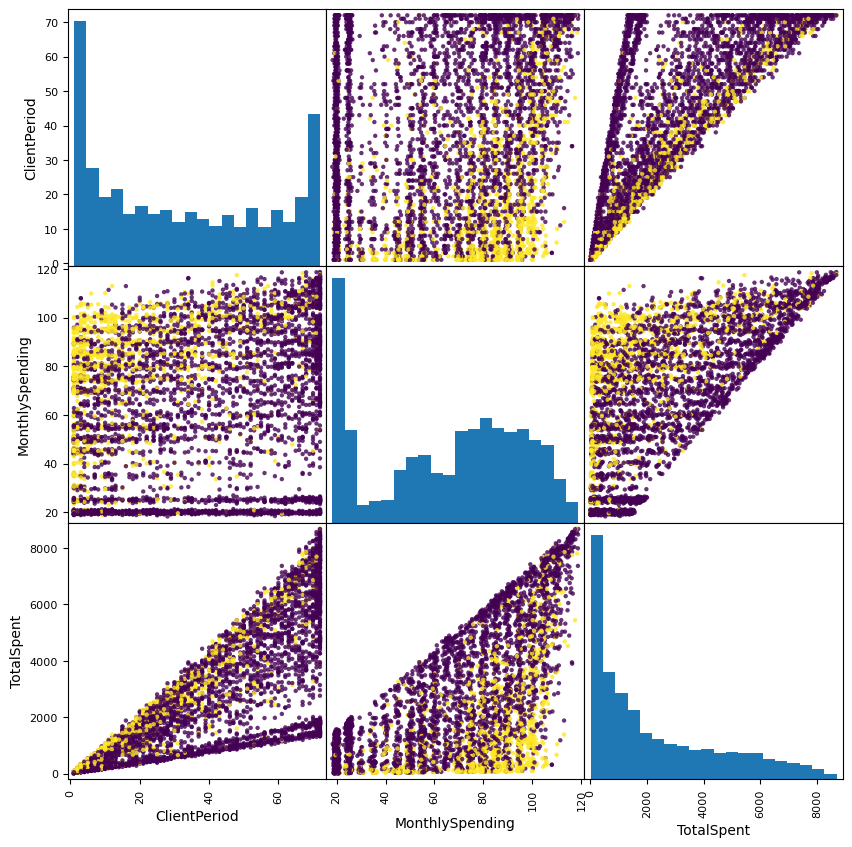

In [10]:
pd.plotting.scatter_matrix(data[num_cols], c=data['Churn'], figsize=(10, 10), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8);

`на графиках можно заметить что чиловые признаки не распределены нормально`
Так же можно заметить на графике 'MonthlySpending' VS 'ClientPeriod' мы видим наибольшее скопление желтых точек в правом нижнем квадранте, из чего можно сделать вывод что чаще всего уходят люди которые тратят наибольшие суммы в месяц и эти люди не остаются на долго клиентами компании.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [29]:
#В категориальных признаках считаем количество значений
f1 = data.groupby('Churn', as_index = False)['HasPartner'].value_counts()
f2 = data.groupby('Churn', as_index = False)['HasChild'].value_counts()
f3 = data.groupby('Churn', as_index = False)['HasPhoneService'].value_counts()
f4 = data.groupby('Churn', as_index = False)['HasMultiplePhoneNumbers'].value_counts()
f5 = data.groupby('Churn', as_index = False)['HasInternetService'].value_counts()
f6 = data.groupby('Churn', as_index = False)['HasOnlineSecurityService'].value_counts()
f7 = data.groupby('Churn', as_index = False)['HasTechSupportAccess'].value_counts()
f8 = data.groupby('Churn', as_index = False)['HasOnlineTV'].value_counts()
f9 = data.groupby('Churn', as_index = False)['HasMovieSubscription'].value_counts()
f10 = data.groupby('Churn', as_index = False)['HasContractPhone'].value_counts()
# заменяем значение 0 и 1 колонки Churn на более понятные понятия "лояльный клиент" и "ушедший клиент"
data_list = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]
for d in data_list:
    d['Churn'] = d['Churn'].apply(lambda x: 'loyal' if x == 0 else 'left')
    
# Строим графики 
x1 = px.bar(f1, x="HasPartner", y="count", color='Churn', barmode='group')
x2 = px.bar(f2, x="HasChild", y="count", color='Churn', barmode='group')
x3 = px.bar(f3, x="HasPhoneService", y="count", color='Churn', barmode='group')
x4 = px.bar(f4, x="HasMultiplePhoneNumbers", y="count", color='Churn', barmode='group')
x5 = px.bar(f5, x="HasInternetService", y="count", color='Churn', barmode='group')
x6 = px.bar(f6, x="HasOnlineSecurityService", y="count", color='Churn', barmode='group')
x7 = px.bar(f7, x="HasTechSupportAccess", y="count", color='Churn', barmode='group')
x8 = px.bar(f8, x="HasOnlineTV", y="count", color='Churn', barmode='group')
x9 = px.bar(f9, x="HasMovieSubscription", y="count", color='Churn', barmode='group')
x10 = px.bar(f10, x="HasContractPhone", y="count", color='Churn', barmode='group')

In [30]:
figure1_traces, figure2_traces, figure3_traces, figure4_traces, figure5_traces = [], [], [], [], []
figure6_traces, figure7_traces, figure8_traces, figure9_traces, figure10_traces = [], [], [], [], []

for trace in range(len(x1["data"])):
    figure1_traces.append(x1["data"][trace])
for trace in range(len(x2["data"])):
    figure2_traces.append(x2["data"][trace])
for trace in range(len(x3["data"])):
    figure3_traces.append(x3["data"][trace])
for trace in range(len(x4["data"])):
    figure4_traces.append(x4["data"][trace])
for trace in range(len(x5["data"])):
    figure5_traces.append(x5["data"][trace])
for trace in range(len(x6["data"])):
    figure6_traces.append(x6["data"][trace])
for trace in range(len(x7["data"])):
    figure7_traces.append(x7["data"][trace])
for trace in range(len(x8["data"])):
    figure8_traces.append(x8["data"][trace])
for trace in range(len(x9["data"])):
    figure9_traces.append(x9["data"][trace])
for trace in range(len(x10["data"])):
    figure10_traces.append(x10["data"][trace])
#Create a subplots
this_figure = sp.make_subplots(rows=2, cols=5, subplot_titles=('Has Partner', 'Has Child', 
                                                               'Has Phone Service', 'Has Multiple Phone Numbers', 
                                                               'Has Internet Service', 'Has On line Security Service',
                                                               'Has Tech Support Access', 'Has Online TV',
                                                               'Has Movie Subscription', 'Has Contract Phone'),                               
                               ) 


for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row=1, col=2)
for traces in figure3_traces:
    this_figure.append_trace(traces, row=1, col=3)
for traces in figure4_traces:
    this_figure.append_trace(traces, row=1, col=4)
for traces in figure5_traces:
    this_figure.append_trace(traces, row=1, col=5)
for traces in figure6_traces:
    this_figure.append_trace(traces, row=2, col=1)
for traces in figure7_traces:
    this_figure.append_trace(traces, row=2, col=2)
for traces in figure8_traces:
    this_figure.append_trace(traces, row=2, col=3)
for traces in figure9_traces:
    this_figure.append_trace(traces, row=2, col=4)
for traces in figure10_traces:
    this_figure.append_trace(traces, row=2, col=5)

this_figure.update_layout(
    autosize=False,
    width=1500,
    height=800,)

this_figure

`из графиков видно что компанию покидают чаще всего люди у которых нет партнера и нет детей. Так же можно заметить что те кто пользуются Мульти телефонным номером чаще отказываются от услуг компании че те кто не использует данную услугу`

`среди клиентов использующих оптоволокно - огромный процент отказавшихся от услуг компании, на данную услугу необходимо обратить особое внимание`
`так же видно что люди которе Не пользуются улугами Онлайн защиты и не пользуются услугами Технической поддержки уходят из компании чаще`
`можно отметить что клиенты без долгосрочного контракта намного чаще уходят из компании, что в целом объяснимо`

так как столбцы 'ClientPeriod', 'MonthlySpending', 'TotalSpent' имеют сильную корреляцию, удаляем столбец 'TotalSpent', так как он не несет для нас информации

In [49]:
data = data.drop('TotalSpent', axis = 1)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [8]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

`преобразуем категориальные признаки`

In [28]:
data_dummies = pd.get_dummies(data, columns=cat_cols)
data.shape

(5273, 19)

`размерность таблицы увеличилась, значит изменения произошли верно. проверим это:`

In [29]:
cals = list(data_dummies.columns)
cals.remove('Churn')
data_dummies.head(3)

,ClientPeriod,MonthlySpending,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,0,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,0,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,1,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


`теперь масштабируем признаки`

In [30]:
# теперь отмасштабируем признаки
data_dummies = pd.get_dummies(data, columns=cat_cols)
pca = StandardScaler()
X = pca.fit_transform(data_dummies[cals])

#делим датасет на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, data_dummies['Churn'], test_size=0.2)

In [33]:
param_grid = {'Cs':[13, 12, 11, 10, 9, 8]}
gbr_grid_search = GridSearchCV(LogisticRegressionCV(), 
                               param_grid,
                               cv=5,
                               scoring='roc_auc',
                               refit=True)
gbr_grid_search.fit(X_train, y_train)
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)

{'Cs': 11}
0.844483108183951


так как часть колонок не несет смысловой нагрузки, удалим лишние

In [118]:
data_for_modeling = data_dummies.drop(['Sex_Male', 'IsSeniorCitizen_1', 'HasPartner_Yes', 'HasChild_No', 'IsBillingPaperless_Yes', 'HasPhoneService_Yes'], axis = 1)
# создадим список колонок
c = list(data_for_modeling.columns)
c.remove('Churn')
# теперь отмасштабируем признаки
pca = StandardScaler()
X = pca.fit_transform(data_for_modeling[c])
#делим датасет на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X, data_for_modeling['Churn'], test_size=0.2)
# param_grid = {'Cs':[100, 11, 10, 1]}

#создаем гридсёрч для подбора лучших параметров С
gbr_grid_search = GridSearchCV(LogisticRegressionCV(), 
                               param_grid,
                               cv=5,
                               scoring='roc_auc',
                               refit=True)
gbr_grid_search.fit(X_train, y_train)
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)


`можем заметить что без этих колонок значение немного улучшилось 0.8437 вместо 0.8416`

In [57]:
gbr_grid_search.score(X_test, y_test)

0.8343663135752386

In [65]:
model = LogisticRegressionCV(Cs = 12, scoring='roc_auc', cv = 5, refit=True).fit(X_train, y_train)
model.score(X_train, y_train)

0.8490224883840511

`в итоге получаем с выставленными параметрами получаем 0.849 на тестовой выборке`

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

`лучшие параметры: LogisticRegressionCV() с Cs = 12 Значеник для тестовой` **0.849**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
            'subsample'    : [0.9, 0.5, 0.2, 0.1],
            'n_estimators' : [100,500,1000, 1500],
            'max_depth'    : [4,6,8,10]
            }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
tqdm(grid_GBR.fit(X_train, y_train))

0it [00:00, ?it/s]

In [13]:
grid_GBR.score(X_test, y_test)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5)

 The best score across ALL searched params:
 0.2951658369557921

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}


In [69]:
from catboost import CatBoostClassifier
from catboost import * 

`разбиваем датасет на тестовую и тренировочную выборки`

In [108]:
y = data['Churn']
X = data.drop('Churn', axis=1)
pool = Pool(data = data, label = y, cat_features = cat_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

`Построим модель кетбустинга с кросс валидацией`

In [72]:
parameters = {'loss_function' : 'Logloss',
                 'learning_rate' : 0.01,
                  'iterations'    : 200,
                  'custom_loss' : 'AUC',
                  'random_seed' : 63,
                  
                 }
cv_data = cv(params=parameters, pool = Pool( X, label = y, cat_features = cat_cols), fold_count= 5, shuffle = True, plot = True, verbose=False, stratified=True, 
             early_stopping_rounds=20)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.4414094733
bestIteration = 199

Training on fold [1/5]

bestTest = 0.4307317571
bestIteration = 199

Training on fold [2/5]

bestTest = 0.4219732841
bestIteration = 199

Training on fold [3/5]

bestTest = 0.4097910203
bestIteration = 199

Training on fold [4/5]

bestTest = 0.4047208924
bestIteration = 199



`обучаем модель с лучшими параметрами`

In [109]:
new_model = CatBoostClassifier(loss_function  ='Logloss',
                 learning_rate = 0.02,
                  iterations    = 250,
                  custom_loss = 'AUC',
                  random_seed =63)
new_model.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_test, y_test), verbose=True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6805640	test: 0.6805510	best: 0.6805510 (0)	total: 95.2ms	remaining: 23.7s
1:	learn: 0.6701378	test: 0.6698266	best: 0.6698266 (1)	total: 189ms	remaining: 23.4s
2:	learn: 0.6589416	test: 0.6586252	best: 0.6586252 (2)	total: 361ms	remaining: 29.7s
3:	learn: 0.6481152	test: 0.6477810	best: 0.6477810 (3)	total: 530ms	remaining: 32.6s
4:	learn: 0.6379159	test: 0.6376332	best: 0.6376332 (4)	total: 680ms	remaining: 33.3s
5:	learn: 0.6283495	test: 0.6281414	best: 0.6281414 (5)	total: 762ms	remaining: 31s
6:	learn: 0.6211734	test: 0.6207792	best: 0.6207792 (6)	total: 865ms	remaining: 30s
7:	learn: 0.6131087	test: 0.6128338	best: 0.6128338 (7)	total: 1.04s	remaining: 31.6s
8:	learn: 0.6062221	test: 0.6057111	best: 0.6057111 (8)	total: 1.12s	remaining: 30s
9:	learn: 0.5997005	test: 0.5988460	best: 0.5988460 (9)	total: 1.18s	remaining: 28.3s
10:	learn: 0.5920380	test: 0.5912450	best: 0.5912450 (10)	total: 1.31s	remaining: 28.6s
11:	learn: 0.5840234	test: 0.5834437	best: 0.5834437 (11)

In [110]:
y_predict = new_model.predict_proba(X_test)[:,1:]
roc_auc1 = roc_auc_score(y_test, y_predict)
roc_auc1

0.8517232937959577

`Лучшая модель получена с помощью кетбустинга`
### лучше значение ROC_AUC на тестовой части 0.851

In [37]:

X_test_ = pd.read_csv('./Data_HW/test.csv')
X_test_.head(2)



,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.1,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.5,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


# Предсказания

In [111]:
X_test_ = pd.read_csv('./Data_HW/test.csv')
X_test_ = X_test_.drop(['TotalSpent'], axis = 1)
submission = pd.read_csv('./Data_HW/submission.csv', index_col= 0 )
submission['Churn'] = new_model.predict_proba(X_test_)[:,1:]
submission.to_csv('./Data_HW/my_submission.csv', sep=',')

## скор на каггле 0.85496
Team Anna_Danilova

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.